In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-10-28 05:51:49.768182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761630709.999955      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761630710.061150      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print(f'X_train shape: {x_train.shape}')
print(f'Y_train shape: {y_train.shape}')

print(f'X_test shape: {x_test.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [4]:
label_dict = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [5]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# x_train = x_train[:, :, :, 0]
# x_test = x_test[:, :, :, 0]

# print(f'X_train shape: {x_train.shape}')
# print(f'Y_train shape: {y_train.shape}')

# print(f'X_test shape: {x_test.shape}')
# print(f'Y_test shape: {y_test.shape}')

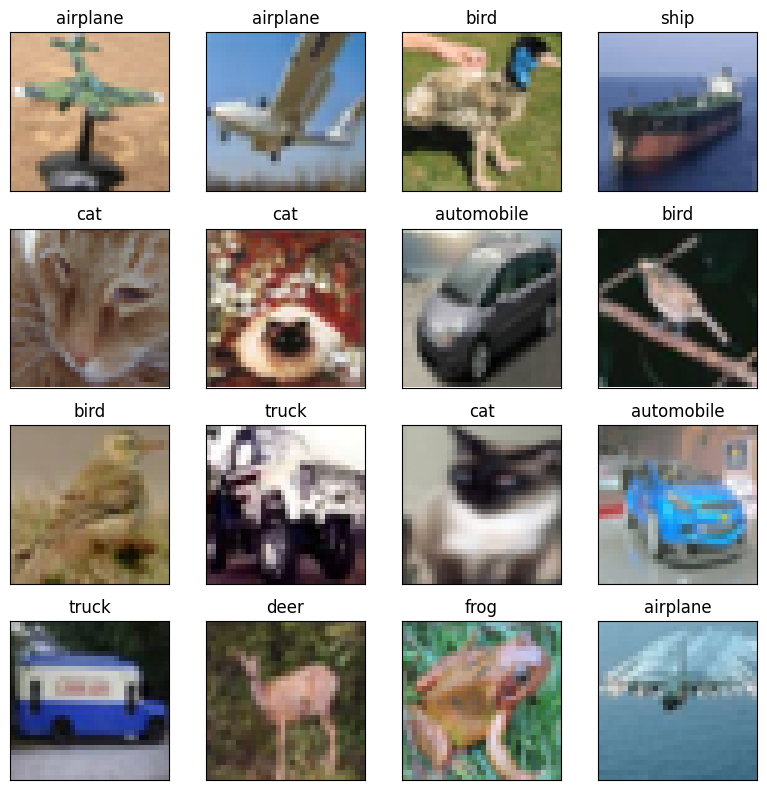

In [6]:
plt.figure(figsize = (8,8))
n = 4

for i in range(n * n):
  plt.subplot(n, n, i + 1)
  random_idx = np.random.randint(0, x_train.shape[0])
  plt.imshow(x_train[random_idx], cmap = 'gray')
  plt.title(f'{label_dict[y_train[random_idx]]}')
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [8]:
# change input size

x_expanded= np.array([np.flip(img, axis=1) for img in x_train_norm])

x_train_norm = np.concatenate([x_train_norm, x_expanded], axis=0)
y_train = np.concatenate([y_train, y_train], axis=0)

print(f'X_train shape: {x_train_norm.shape}')
print(f'Y_train shape: {y_train.shape}')

print(f'X_test shape: {x_test.shape}')
print(f'Y_test shape: {y_test.shape}')

X_train shape: (100000, 32, 32, 3)
Y_train shape: (100000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

In [10]:
model = Sequential([
    
    Conv2D(64, (3,3), activation = 'relu', input_shape = (32, 32, 3)), # number of filters, filter size, activation
    BatchNormalization(),
    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)), #always end conv block with a max pool layer

    Dropout(0.25),

    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Dropout(0.25),

    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    BatchNormalization(),
    Conv2D(64, (3,3), activation = 'relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Dropout(0.25),

    Flatten(),
    Dense(32, activation = 'relu'),
    Dropout(0.25),
    Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1761630737.090805      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', #cross entropy used for classification
    metrics = ['accuracy'],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           33

 Total params: 206,762 (807.66 KB)

 Trainable params: 205,994 (804.66 KB)

 Non-trainable params: 768 (3.00 KB)

In [12]:
train_history = model.fit(x_train_norm, y_train, validation_data = (x_test_norm, y_test), epochs = 100, batch_size = 32)

Epoch 1/100


I0000 00:00:1761630748.387760      60 service.cc:148] XLA service 0x7dfe74003260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761630748.388856      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1761630749.060644      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


  30/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.1379 - loss: 2.8803

I0000 00:00:1761630754.011473      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - accuracy: 0.3648 - loss: 1.7322 - val_accuracy: 0.5135 - val_loss: 1.4845
Epoch 2/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.6506 - loss: 1.0077 - val_accuracy: 0.7387 - val_loss: 0.7644
Epoch 3/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7265 - loss: 0.8083 - val_accuracy: 0.7295 - val_loss: 0.8150
Epoch 4/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7602 - loss: 0.7107 - val_accuracy: 0.7974 - val_loss: 0.5936
Epoch 5/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7843 - loss: 0.6428 - val_accuracy: 0.7978 - val_loss: 0.6045
Epoch 6/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8012 - loss: 0.6002 - val_accuracy: 0.8055 - val_loss: 0.5751
Epoch 7/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8113 - loss: 0.5684 - val_accuracy: 0.8293 - val_loss: 0.5063
Epoch 8/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8224 - loss: 0.533

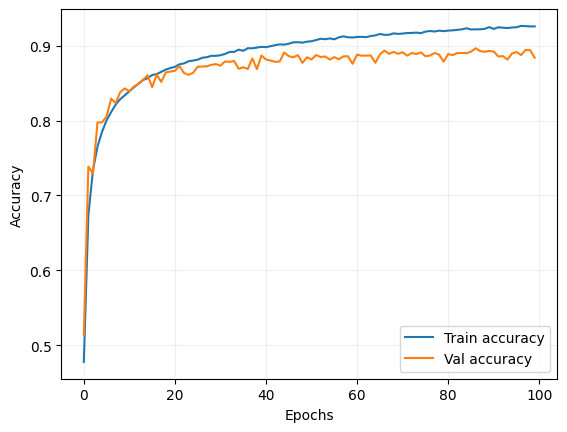

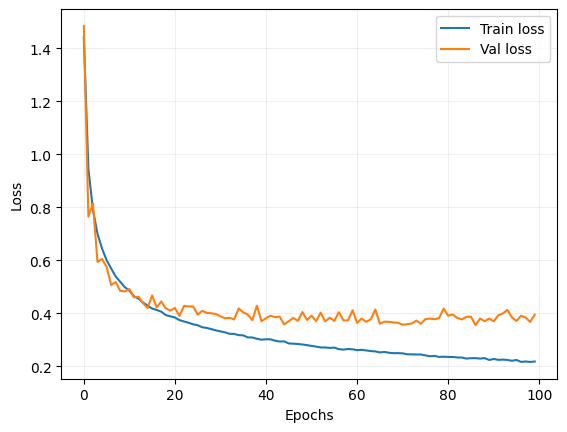

In [13]:
plt.plot(train_history.history['accuracy'], label = 'Train accuracy')
plt.plot(train_history.history['val_accuracy'], label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha = 0.2)
plt.savefig("graph.png")
plt.show()


plt.plot(train_history.history['loss'], label = 'Train loss')
plt.plot(train_history.history['val_loss'], label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha = 0.2)
plt.savefig("graph2.png")
plt.show()

In [14]:
print(y_test.shape)
y_test = np.argmax(y_test, axis=1)

(10000, 10)


In [15]:
y_pred = model.predict(x_test_norm)
y_pred = np.argmax(y_pred, axis=-1)

test_accuracy = np.mean(y_pred == y_test)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
0.8841


In [16]:
from sklearn.metrics import classification_report

true_classes = y_test

print("Classification Report:")
print(classification_report(true_classes, y_pred, 
                          target_names=list(label_dict.values()), digits=4))

Classification Report:
              precision    recall  f1-score   support

    airplane     0.7993    0.9560    0.8707      1000
  automobile     0.9402    0.9430    0.9416      1000
        bird     0.8902    0.8110    0.8488      1000
         cat     0.8329    0.7130    0.7683      1000
        deer     0.8991    0.8820    0.8905      1000
         dog     0.7933    0.8790    0.8340      1000
        frog     0.8958    0.9370    0.9159      1000
       horse     0.9370    0.8920    0.9139      1000
        ship     0.9401    0.9100    0.9248      1000
       truck     0.9377    0.9180    0.9277      1000

    accuracy                         0.8841     10000
   macro avg     0.8866    0.8841    0.8836     10000
weighted avg     0.8866    0.8841    0.8836     10000



In [17]:
per_class_acc = [(y_pred[y_test == i] == i).mean() 
                 for i in range(len(label_dict))]

print("per-class Accuracy:")
for class_name, accuracy in zip(label_dict.values(), per_class_acc):
    print(f"{class_name:>10}: {accuracy:.4f}")

per-class Accuracy:
  airplane: 0.9560
automobile: 0.9430
      bird: 0.8110
       cat: 0.7130
      deer: 0.8820
       dog: 0.8790
      frog: 0.9370
     horse: 0.8920
      ship: 0.9100
     truck: 0.9180


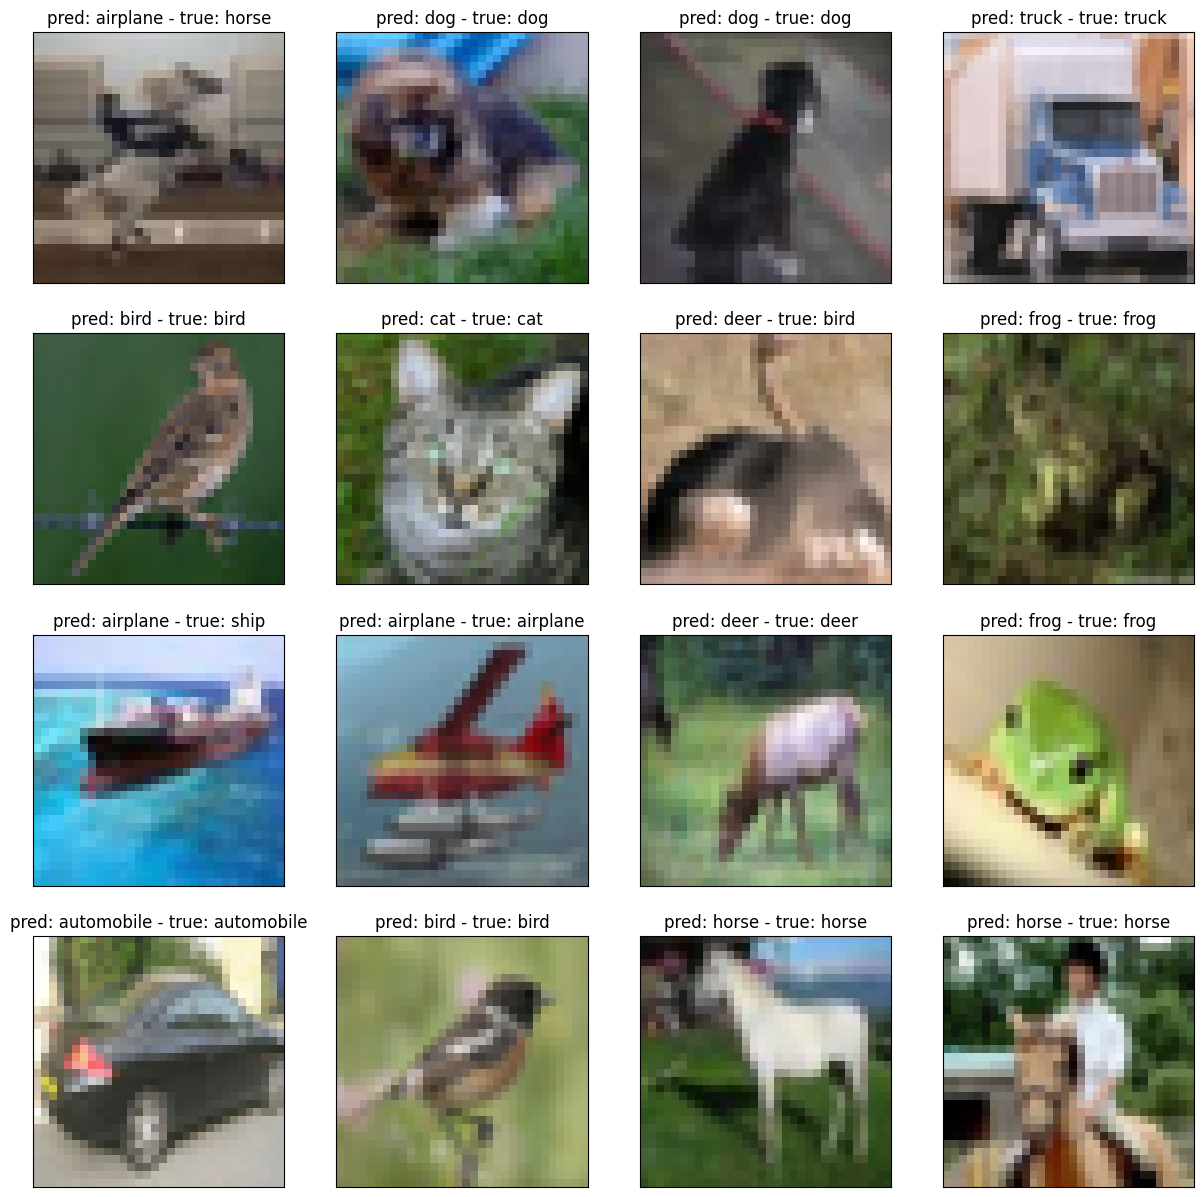

In [18]:
plt.figure(figsize = (15,15))
n = 4

for i in range(n * n):
    plt.subplot(n, n, i + 1)
    random_idx = np.random.randint(0, x_test.shape[0])
    plt.imshow(x_test[random_idx], cmap = 'gray')
    plt.title(f'pred: {label_dict[y_pred[random_idx]]} - true: {label_dict[y_test[random_idx]]}')
    plt.xticks([])
    plt.yticks([])

plt.savefig("result_imgs.png")

In [19]:
plt.savefig("result_imgs.png")

<Figure size 640x480 with 0 Axes>